In [130]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [131]:
df_tesla = pd.read_csv('./data/Google_Trends_TimeSeries/TESLA Search Trend vs Price.csv')
df_tesla.head()
print(f'The shape of set is {df_tesla.shape}')
print(f'The size of set is {df_tesla.size}')
print(f'The columns names are {df_tesla.columns}')
print(f'The largest value of web searches is {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'The lowest value of web searches is {df_tesla.TSLA_WEB_SEARCH.min()}')


The shape of set is (124, 3)
The size of set is 372
The columns names are Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')
The largest value of web searches is 31
The lowest value of web searches is 2


In [132]:
df_unemployment = pd.read_csv('./data/Google_Trends_TimeSeries/UE Benefits Search vs UE Rate 2004-19.csv')
print(f'The shape of set is {df_unemployment.shape}')
print(f'The size of set is {df_unemployment.size}')
print(f'The columns names are {df_unemployment.columns}')
print(f'The largest value of web searches is {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')
print(f'The lowest value of web searches is {df_unemployment.UE_BENEFITS_WEB_SEARCH.min()}')


The shape of set is (181, 3)
The size of set is 543
The columns names are Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')
The largest value of web searches is 100
The lowest value of web searches is 14


In [133]:
df_bitcoin = pd.read_csv('./data/Google_Trends_TimeSeries/Daily Bitcoin Price.csv')
print(f'The shape of set is {df_bitcoin.shape}')
print(f'The size of set is {df_bitcoin.size}')
print(f'The columns names are {df_bitcoin.columns}')
print(f'The largest value of close value is {df_bitcoin.CLOSE.max()}')
print(f'The lowest value of close value is {df_bitcoin.CLOSE.min()}')

The shape of set is (2204, 3)
The size of set is 6612
The columns names are Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')
The largest value of close value is 19497.400391
The lowest value of close value is 178.102997


In [134]:
df_bitcoin_search = pd.read_csv('./data/Google_Trends_TimeSeries/Bitcoin Search Trend.csv')
print(f'The shape of set is {df_bitcoin_search.shape}')
print(f'The size of set is {df_bitcoin_search.size}')
print(f'The columns names are {df_bitcoin_search.columns}')
print(f'The largest value of close value is {df_bitcoin_search.BTC_NEWS_SEARCH.max()}')
print(f'The lowest value of close value is {df_bitcoin_search.BTC_NEWS_SEARCH.min()}')

The shape of set is (73, 2)
The size of set is 146
The columns names are Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')
The largest value of close value is 100
The lowest value of close value is 3


Missing values

In [135]:
print(f'Missing values for Tesla: {df_tesla.isna().values.any()}')
print(f'Missing values for Unemployemnt: {df_unemployment.isna().values.any()}')
print(f'Missing values for Bitcoin price: {df_bitcoin.isna().values.any()}')
print(f'Missing values for Bitcoin search: {df_bitcoin_search.isna().values.any()}')

Missing values for Tesla: False
Missing values for Unemployemnt: False
Missing values for Bitcoin price: True
Missing values for Bitcoin search: False


In [136]:
df_bitcoin = df_bitcoin.dropna()

String to datetime

In [137]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_bitcoin.DATE = pd.to_datetime(df_bitcoin.DATE)
df_bitcoin_search.MONTH = pd.to_datetime(df_bitcoin_search.MONTH)


In [138]:
df_bitcoin_m = df_bitcoin.resample("ME", on='DATE').mean()
df_bitcoin_m.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07


In [139]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [140]:
years = mdates.YearLocator()         
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

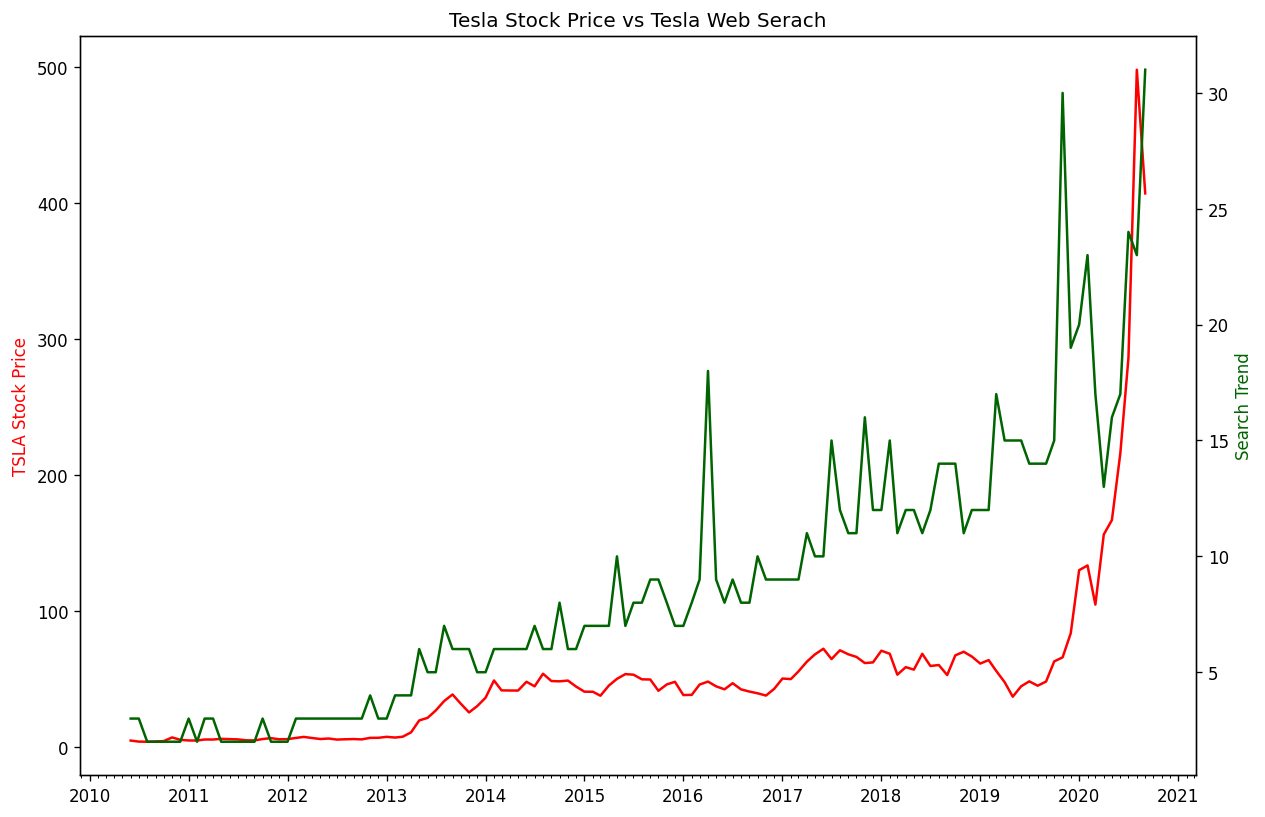

In [144]:
plt.figure(figsize=(12,8), dpi=120)
plt.title('Tesla Stock Price vs Tesla Web Serach')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='red')
ax2.set_ylabel('Search Trend', color='darkgreen')

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color = 'red')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color = 'darkgreen')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()